In [1]:
import pandas as pd  
import numpy as np
import geopandas


# making dataframe  
mode = pd.read_csv("transportation_mode_ACSDT5Y2023.B08301-Data.csv")  

new_names = (
    mode.columns
    .str.replace(' #', '_num')
    .str.replace('-', '_') # this is for one problem making column `'community - board'`
    .str.replace(' ', '_')
    .str.lower()
)

if new_names.is_unique == 1:
    mode.columns = new_names # updates my column names
mode.columns

#replacing ridership 0 values with nan
mode = mode.replace("0", np.nan)
mode = mode.replace("NaN", np.nan)

mode.head()

,geo_id,name,b08301_001e,b08301_001m,b08301_002e,b08301_002m,b08301_003e,b08301_003m,b08301_004e,b08301_004m,...,b08301_017m,b08301_018e,b08301_018m,b08301_019e,b08301_019m,b08301_020e,b08301_020m,b08301_021e,b08301_021m,unnamed:_44
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Car, truck, or van:","Margin of Error!!Total:!!Car, truck, or van:","Estimate!!Total:!!Car, truck, or van:!!Drove a...","Margin of Error!!Total:!!Car, truck, or van:!!...","Estimate!!Total:!!Car, truck, or van:!!Carpooled:","Margin of Error!!Total:!!Car, truck, or van:!!...",...,Margin of Error!!Total:!!Motorcycle,Estimate!!Total:!!Bicycle,Margin of Error!!Total:!!Bicycle,Estimate!!Total:!!Walked,Margin of Error!!Total:!!Walked,Estimate!!Total:!!Other means,Margin of Error!!Total:!!Other means,Estimate!!Total:!!Worked from home,Margin of Error!!Total:!!Worked from home,NaN
1,0400000US06,California,18331098,23377,14033454,21045,12294684,24667,1738770,14640,...,1692,130817,2773,436223,6201,226652,3858,2832962,17462,NaN
2,0500000US06001,"Alameda County, California",829369,3969,512128,4760,444577,4521,67551,2537,...,263,11090,866,22566,1339,9719,855,192628,3418,NaN
3,1400000US06001400100,Census Tract 4001; Alameda County; California,1525,280,700,148,574,128,126,83,...,14,9,14,91,83,19,20,607,156,NaN
4,1400000US06001400200,Census Tract 4002; Alameda County; California,1065,151,328,74,271,78,57,34,...,20,16,21,22,18,NaN,14,493,149,NaN


<Axes: >

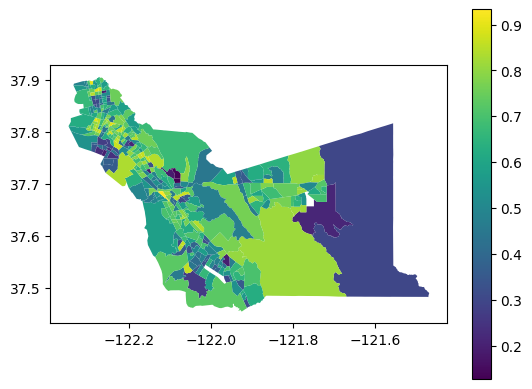

In [16]:
gdf_acs = geopandas.read_file("/workspaces/CYPLAN-255/final_census_tracts/acs_ala_ct.geojson")
gdf_acs.head()

mask = mode['geo_id'].isin(gdf_acs['geoidfq'].to_list()) # This also returns a Boolean mask
mode_masked = mode.loc[mask]



gdf_acs["car"] = mode_masked["b08301_002e"]
gdf_acs["total"] = mode_masked["b08301_001e"]
gdf_acs["bike"] = mode_masked["b08301_018e"]

gdf_acs['car'] = gdf_acs['car'].astype(float)
gdf_acs['bike'] = gdf_acs['bike'].astype(float)
gdf_acs['total'] = gdf_acs['total'].astype(float)

gdf_acs["car_perc"] = gdf_acs['car']/gdf_acs['total']
gdf_acs["bike_perc"] = gdf_acs['bike']/gdf_acs['total']
gdf_acs.plot("car_perc", legend=True)
